In [224]:
# Data Preparation, putting the CSVs in the Dataframe 
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np

df1 = pd.read_csv('T20cricket_dataset.csv')

#Removing the unnecessary colums
df1=df1.drop(['Sno','Winner','MatchID','Ground'], axis = 1)

#keeping the required countries' records or instances
lc=['England' , 'India' , 'Australia' , 'Pakistan' , 'New Zealand' , 'South Africa' , 'Bangladesh', 'Afghanistan', 'West Indies', 'Sri Lanka']

df1=df1[df1.Team1.isin(lc)]

df1=df1[df1.Team2.isin(lc)]

df1

,Team1,Team2,Year,Runs,Fours,Sixes,MatchTime,Ha1,Ha2,T1w,T2w,T1b,Groundcapacity,AvgSR
0,West Indies,England,2019,287,25,13,daynight,1,0,0,1,1,12400,125.31
1,West Indies,England,2019,223,23,6,daynight,1,0,1,0,0,8000,115.31
2,West Indies,England,2019,140,14,7,daynight,1,0,1,0,1,8000,109.92
3,England,Pakistan,2019,336,31,10,day,1,0,0,1,0,5500,124.65
4,New Zealand,England,2019,302,27,11,day,1,0,0,1,1,18000,146.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,Sri Lanka,West Indies,2012,242,28,6,night,0,0,0,1,0,35000,131.56
1037,Sri Lanka,England,2012,298,27,11,night,0,0,0,1,1,35000,118.72
1038,Sri Lanka,Pakistan,2012,243,28,1,night,0,0,1,0,1,35000,114.40
1039,Sri Lanka,West Indies,2012,230,13,8,night,0,0,0,1,0,35000,115.67


In [225]:
#Preparation of the DataFrame from Ratings.csv

df2 = pd.read_csv('ratings.csv')
df2=df2.drop(['Sno'], axis = 1)

lc=['England','India','Australia','Pakistan','New Zealand','South Africa','Bangladesh','Afghanistan','West Indies','Sri Lanka']

df2=df2[df2.Country.isin(lc)]

df2=df2[df2.Country.isin(lc)]

#This value will be used in imputation of the missing rating
print(df2["Rating"].mean())

df2

128.06766917293234


,Year,Country,Rating
0,2012,England,129
1,2012,South Africa,122
2,2012,Sri Lanka,117
3,2012,New Zealand,114
4,2012,Pakistan,107
...,...,...,...
147,2011,England,105
148,2011,Pakistan,103
149,2011,New Zealand,94
150,2011,Bangladesh,68


In [226]:
#Ratings are merged with the main Dataframe based on the year and country 

#df2["Year"] = df2["Year"].astype(str)
merged_df = pd.merge(left=df1,right=df2, how='left', left_on=["Team1","Year"], right_on = ["Country","Year"])
merged_df.rename(columns = {'Rating':'Rating1'}, inplace = True)

merged_df=merged_df.drop(['Country'], axis = 1)

merged_df = pd.merge(left=merged_df,right=df2, how='left', left_on=["Team2",'Year'], right_on = ["Country","Year"])
merged_df.rename(columns = {'Rating':'Rating2'}, inplace = True)
merged_df=merged_df.drop(['Country'], axis = 1)


merged_df

,Team1,Team2,Year,Runs,Fours,Sixes,MatchTime,Ha1,Ha2,T1w,T2w,T1b,Groundcapacity,AvgSR,Rating1,Rating2
0,West Indies,England,2019,287,25,13,daynight,1,0,0,1,1,12400,125.31,226.00,261
1,West Indies,England,2019,223,23,6,daynight,1,0,1,0,0,8000,115.31,226.00,261
2,West Indies,England,2019,140,14,7,daynight,1,0,1,0,1,8000,109.92,226.00,261
3,England,Pakistan,2019,336,31,10,day,1,0,0,1,0,5500,124.65,261.00,286
4,New Zealand,England,2019,302,27,11,day,1,0,0,1,1,18000,146.25,254.00,261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,Sri Lanka,West Indies,2012,242,28,6,night,0,0,0,1,0,35000,131.56,117.00,93
892,Sri Lanka,England,2012,298,27,11,night,0,0,0,1,1,35000,118.72,117.00,129
893,Sri Lanka,Pakistan,2012,243,28,1,night,0,0,1,0,1,35000,114.40,117.00,107
894,Sri Lanka,West Indies,2012,230,13,8,night,0,0,0,1,0,35000,115.67,117.00,93


In [227]:
#Producing the Labels and summing up the ratings
merged_df["Elevelval"]=( merged_df["Fours"]*4 + merged_df["Sixes"]*6)/merged_df["Runs"]

#Here imputing the missing values with the average rating across all years
merged_df['Rating1'] = merged_df['Rating1'].fillna(128)
merged_df['Rating2'] = merged_df['Rating2'].fillna(128)

#Combined Ratings adding the ratings of both team
merged_df["CRating"]=merged_df["Rating1"] + merged_df["Rating2"]

#Dropping the ratings of team1 and team2
merged_df=merged_df.drop(["Rating1","Rating2"], axis = 1)

#In order to set the label
print(merged_df["Elevelval"].mean())

merged_df

0.555021889814801


,Team1,Team2,Year,Runs,Fours,Sixes,MatchTime,Ha1,Ha2,T1w,T2w,T1b,Groundcapacity,AvgSR,Elevelval,CRating
0,West Indies,England,2019,287,25,13,daynight,1,0,0,1,1,12400,125.31,0.62,487.00
1,West Indies,England,2019,223,23,6,daynight,1,0,1,0,0,8000,115.31,0.57,487.00
2,West Indies,England,2019,140,14,7,daynight,1,0,1,0,1,8000,109.92,0.70,487.00
3,England,Pakistan,2019,336,31,10,day,1,0,0,1,0,5500,124.65,0.55,547.00
4,New Zealand,England,2019,302,27,11,day,1,0,0,1,1,18000,146.25,0.58,515.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,Sri Lanka,West Indies,2012,242,28,6,night,0,0,0,1,0,35000,131.56,0.61,210.00
892,Sri Lanka,England,2012,298,27,11,night,0,0,0,1,1,35000,118.72,0.58,246.00
893,Sri Lanka,Pakistan,2012,243,28,1,night,0,0,1,0,1,35000,114.40,0.49,224.00
894,Sri Lanka,West Indies,2012,230,13,8,night,0,0,0,1,0,35000,115.67,0.43,210.00


In [228]:
def label_function(x):
    if x > 0.60:
        return "H"
    elif x < 0.55:
        return "L"
    else:
        return "A"

merged_df["Elevel"] = merged_df["Elevelval"].apply(label_function)

#Dropping the ratings of team1 and team2
merged_df=merged_df.drop(["Elevelval"], axis = 1)
merged_df

,Team1,Team2,Year,Runs,Fours,Sixes,MatchTime,Ha1,Ha2,T1w,T2w,T1b,Groundcapacity,AvgSR,CRating,Elevel
0,West Indies,England,2019,287,25,13,daynight,1,0,0,1,1,12400,125.31,487.00,H
1,West Indies,England,2019,223,23,6,daynight,1,0,1,0,0,8000,115.31,487.00,A
2,West Indies,England,2019,140,14,7,daynight,1,0,1,0,1,8000,109.92,487.00,H
3,England,Pakistan,2019,336,31,10,day,1,0,0,1,0,5500,124.65,547.00,L
4,New Zealand,England,2019,302,27,11,day,1,0,0,1,1,18000,146.25,515.00,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,Sri Lanka,West Indies,2012,242,28,6,night,0,0,0,1,0,35000,131.56,210.00,H
892,Sri Lanka,England,2012,298,27,11,night,0,0,0,1,1,35000,118.72,246.00,A
893,Sri Lanka,Pakistan,2012,243,28,1,night,0,0,1,0,1,35000,114.40,224.00,L
894,Sri Lanka,West Indies,2012,230,13,8,night,0,0,0,1,0,35000,115.67,210.00,L


In [229]:
#Removing Duplicates from the Dataframes to remove the duplicate instances
merged_df=merged_df.drop(["Year","Fours","Sixes","Runs"], axis = 1)
merged_df = merged_df[~merged_df.duplicated(keep = 'first')]
merged_df


,Team1,Team2,MatchTime,Ha1,Ha2,T1w,T2w,T1b,Groundcapacity,AvgSR,CRating,Elevel
0,West Indies,England,daynight,1,0,0,1,1,12400,125.31,487.00,H
1,West Indies,England,daynight,1,0,1,0,0,8000,115.31,487.00,A
2,West Indies,England,daynight,1,0,1,0,1,8000,109.92,487.00,H
3,England,Pakistan,day,1,0,0,1,0,5500,124.65,547.00,L
4,New Zealand,England,day,1,0,0,1,1,18000,146.25,515.00,A
...,...,...,...,...,...,...,...,...,...,...,...,...
869,India,Pakistan,daynight,1,0,0,1,1,132000,119.18,210.00,H
873,Sri Lanka,Pakistan,night,1,0,1,0,1,35000,94.63,224.00,L
874,Sri Lanka,Pakistan,night,1,0,0,1,0,35000,91.52,224.00,L
879,Bangladesh,Pakistan,night,0,0,1,0,1,35000,122.34,235.00,H


In [12]:
#Exploratory Data Analysis
merged_df.info()

'''Categorical vs. Numerical
1. Bar chart
2. Violin plot
3. Categorical box plot
4.Swarm plot'''

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 0 to 883
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Team1           486 non-null    object 
 1   Team2           486 non-null    object 
 2   Runs            486 non-null    int64  
 3   Fours           486 non-null    int64  
 4   Sixes           486 non-null    int64  
 5   MatchTime       486 non-null    object 
 6   Ha1             486 non-null    int64  
 7   Ha2             486 non-null    int64  
 8   T1w             486 non-null    int64  
 9   T2w             486 non-null    int64  
 10  T1b             486 non-null    int64  
 11  Groundcapacity  486 non-null    int64  
 12  AvgSR           486 non-null    float64
 13  CRating         486 non-null    float64
 14  Elevel          486 non-null    object 
dtypes: float64(2), int64(9), object(4)
memory usage: 60.8+ KB


'Categorical vs. Numerical\n1. Bar chart\n2. Violin plot\n3. Categorical box plot\n4.Swarm plot'

In [13]:
#merged_df=merged_df.drop(["Runs","Fours","Sixes"], axis = 1)
merged_df.corr()

,Ha1,Ha2,T1w,T2w,T1b,Groundcapacity,AvgSR,CRating
Ha1,1.00,-0.40,-0.00,0.00,0.05,0.08,0.08,0.23
Ha2,-0.40,1.00,0.07,-0.07,0.02,-0.09,-0.07,-0.08
T1w,-0.00,0.07,1.00,-1.00,-0.11,0.03,0.02,-0.00
T2w,0.00,-0.07,-1.00,1.00,0.11,-0.03,-0.02,0.00
T1b,0.05,0.02,-0.11,0.11,1.00,0.04,0.05,0.09
Groundcapacity,0.08,-0.09,0.03,-0.03,0.04,1.00,-0.00,0.02
AvgSR,0.08,-0.07,0.02,-0.02,0.05,-0.00,1.00,0.15
CRating,0.23,-0.08,-0.00,0.00,0.09,0.02,0.15,1.00


In [14]:
#Using One hot encoding to convert the categorical variables into the binary code for putting into the machine learning model
ddf1=pd.get_dummies(merged_df['MatchTime'],drop_first=True)
ddf2=pd.get_dummies(merged_df['Team1'],drop_first=True)
ddf3=pd.get_dummies(merged_df['Team2'],drop_first=True)
ddf1
ddf2
ddf3

,Australia,Bangladesh,England,India,New Zealand,Pakistan,South Africa,Sri Lanka,West Indies
0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
869,0,0,0,0,0,1,0,0,0
873,0,0,0,0,0,1,0,0,0
874,0,0,0,0,0,1,0,0,0
879,0,0,0,0,0,1,0,0,0


In [15]:
#concatenation of one hot encoded columns
merged_df=pd.concat([ddf1,ddf2,ddf3,merged_df],axis ='columns')
merged_df=merged_df.drop(['Team1','Team2','MatchTime'], axis = 1)
df_=merged_df

In [16]:
df_

,daynight,night,Australia,Bangladesh,England,India,New Zealand,Pakistan,South Africa,Sri Lanka,West Indies,Australia,Bangladesh,England,India,New Zealand,Pakistan,South Africa,Sri Lanka,West Indies,Ha1,Ha2,T1w,T2w,T1b,Groundcapacity,AvgSR,CRating,Elevel
0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,12400,125.31,487.00,H
1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,8000,115.31,487.00,A
2,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,8000,109.92,487.00,H
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,5500,124.65,547.00,L
4,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,18000,146.25,515.00,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,132000,119.18,210.00,H
873,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,35000,94.63,224.00,L
874,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,35000,91.52,224.00,L
879,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,35000,122.34,235.00,H


In [17]:
#Scaling the Data for Logistic Regression
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

merged_df[['Groundcapacity']] = ss.fit_transform(merged_df[['Groundcapacity']])
merged_df[['CRating']] = ss.fit_transform(merged_df[['CRating']])

merged_df

,daynight,night,Australia,Bangladesh,England,India,New Zealand,Pakistan,South Africa,Sri Lanka,West Indies,Australia,Bangladesh,England,India,New Zealand,Pakistan,South Africa,Sri Lanka,West Indies,Ha1,Ha2,T1w,T2w,T1b,Groundcapacity,AvgSR,CRating,Elevel
0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,-1.00,125.31,2.76,H
1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,-1.27,115.31,2.76,A
2,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,-1.27,109.92,2.76,H
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,-1.42,124.65,3.46,L
4,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,-0.66,146.25,3.09,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,6.34,119.18,-0.44,H
873,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0.39,94.63,-0.28,L
874,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0.39,91.52,-0.28,L
879,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0.39,122.34,-0.15,H


In [18]:
# Applying Logistic Regression for multi class classification Problem

#Importing the Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt

merged_df[['AvgSR']] = ss.fit_transform(merged_df[['AvgSR']])

In [19]:
merged_df

,daynight,night,Australia,Bangladesh,England,India,New Zealand,Pakistan,South Africa,Sri Lanka,West Indies,Australia,Bangladesh,England,India,New Zealand,Pakistan,South Africa,Sri Lanka,West Indies,Ha1,Ha2,T1w,T2w,T1b,Groundcapacity,AvgSR,CRating,Elevel
0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,-1.00,0.38,2.76,H
1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,-1.27,-0.43,2.76,A
2,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,-1.27,-0.86,2.76,H
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,-1.42,0.32,3.46,L
4,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,-0.66,2.06,3.09,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,6.34,-0.12,-0.44,H
873,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0.39,-2.09,-0.28,L
874,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0.39,-2.34,-0.28,L
879,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0.39,0.14,-0.15,H


In [ ]:
#---------------------------------------------------------------------------------------------------------

#Logistic Regression Classifier

#----------------------------------------------------------------------------------------------------------

In [82]:

#Performing the Multi Class Logistic Regression
from sklearn.multiclass import OneVsRestClassifier

x = merged_df.drop('Elevel', axis=1)
y = merged_df['Elevel']

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.1)

log_reg = OneVsRestClassifier(LogisticRegression())
log_reg.fit(trainX, trainY)
y_pred = log_reg.predict(testX)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print('Error rate: {:.2f}'.format(1 - accuracy_score(testY, y_pred)))


Accuracy: 0.59
Error rate: 0.41


In [71]:
scores = cross_val_score(log_reg, trainX , trainY , cv=10)
scores

array([0.43181818, 0.56818182, 0.52272727, 0.43181818, 0.5       ,
       0.47727273, 0.61363636, 0.55813953, 0.58139535, 0.48837209])

In [72]:
scores.mean()

0.5173361522198732

In [73]:
from sklearn.model_selection import cross_validate
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro'}

scores=cross_validate(log_reg, trainX, trainY, scoring =scoring , cv=7)
scores

{'fit_time': array([0.07877851, 0.07091379, 0.05884266, 0.04790521, 0.05203176,
        0.05218697, 0.05313492]),
 'score_time': array([0.00698328, 0.00698113, 0.00598431, 0.00598145, 0.00498676,
        0.00701761, 0.00598264]),
 'test_acc': array([0.49206349, 0.57142857, 0.49206349, 0.48387097, 0.5483871 ,
        0.53225806, 0.5       ]),
 'test_prec_macro': array([0.44231316, 0.46535257, 0.31907308, 0.41599327, 0.69406907,
        0.52228544, 0.35185185]),
 'test_rec_macro': array([0.43730159, 0.49603175, 0.40238095, 0.42852966, 0.48580247,
        0.48024691, 0.43024691])}

In [74]:
print("Mean of the Accuracy after cross validation",scores['test_acc'][:].mean())
print("Mean of the Macro Averaged Precision after cross validation",scores['test_prec_macro'][:].mean())
print("Mean of the  Macro Averaged Recall after cross validation",scores['test_rec_macro'][:].mean())

Mean of the Accuracy after cross validation 0.5171530977982591
Mean of the Macro Averaged Precision after cross validation 0.45870549168483904
Mean of the  Macro Averaged Recall after cross validation 0.45150574849822966


In [25]:
from sklearn import metrics
cm = metrics.confusion_matrix( testY , y_pred)
print(cm)

[[ 2 12 12]
 [ 0 12 15]
 [ 3  4 38]]


In [26]:
print(metrics.classification_report(testY , y_pred ))

              precision    recall  f1-score   support

           A       0.40      0.08      0.13        26
           H       0.43      0.44      0.44        27
           L       0.58      0.84      0.69        45

    accuracy                           0.53        98
   macro avg       0.47      0.46      0.42        98
weighted avg       0.49      0.53      0.47        98



In [ ]:
#---------------------------------------------------------------------------------------------------------

#Decision Tree Classifier

#----------------------------------------------------------------------------------------------------------


In [27]:
x = df_.drop(['Elevel','AvgSR'], axis=1)
y = df_['Elevel']
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.25)
  
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier(max_depth = 3).fit(trainX, trainY)

dtree_predictions = dtree_model.predict(testX)
  
# creating a confusion matrix
cm = confusion_matrix(testY, dtree_predictions)
cm

array([[ 3,  8, 25],
       [ 3,  7, 27],
       [ 2,  5, 42]], dtype=int64)

In [28]:
print(metrics.classification_report(testY , dtree_predictions ))

              precision    recall  f1-score   support

           A       0.38      0.08      0.14        36
           H       0.35      0.19      0.25        37
           L       0.45      0.86      0.59        49

    accuracy                           0.43       122
   macro avg       0.39      0.38      0.32       122
weighted avg       0.40      0.43      0.35       122



In [ ]:
#---------------------------------------------------------------------------------------------------------

# Naive Bayes Classifier

#----------------------------------------------------------------------------------------------------------

In [29]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [30]:
# training a Naive Bayes classifier
x = df_.drop(['Elevel'], axis=1)
y = df_['Elevel']
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3)

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(trainX, trainY)
gnb_predictions = gnb.predict(testX)
  
# accuracy on X_test
accuracy = gnb.score(testX, testY)
print(accuracy)
  
# creating a confusion matrix
cm = confusion_matrix(testY , gnb_predictions)
print(cm)
print(metrics.classification_report(testY , gnb_predictions ))

0.4520547945205479
[[10 15 14]
 [ 3 21 20]
 [ 6 22 35]]
              precision    recall  f1-score   support

           A       0.53      0.26      0.34        39
           H       0.36      0.48      0.41        44
           L       0.51      0.56      0.53        63

    accuracy                           0.45       146
   macro avg       0.47      0.43      0.43       146
weighted avg       0.47      0.45      0.45       146



In [ ]:
!pip install imblearn

In [ ]:
 !pip install --upgrade scikit-learn

In [ ]:
#---------------------------------IMPORTANT----------------------------------------------------------------------------------
#------------Note that the above shown models were generated on the unbalanced data but as per the suggestion of the professor
#------------Used SMOTE technique to enhance and balance the dataset

<AxesSubplot:title={'center':'Count of each class'}>

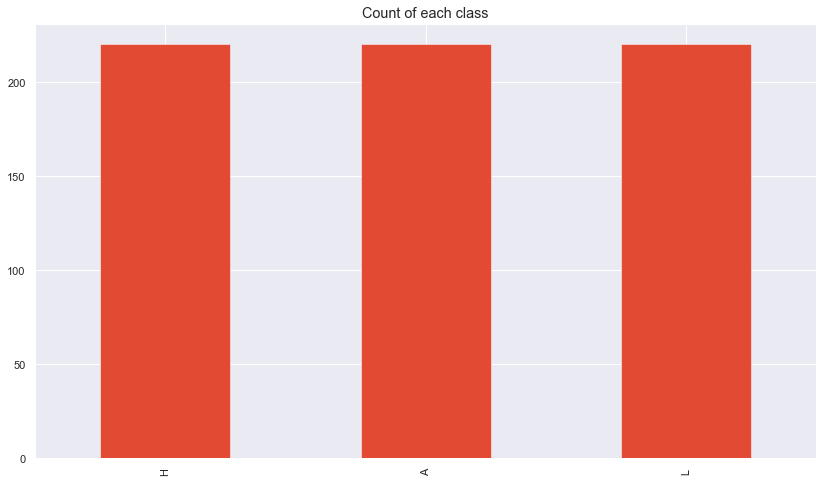

In [111]:
## Performing the SMOTE and then Plotting the results showing that how the dataset size increased and became more balanced

from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

x = df_.drop(['Elevel'], axis=1)
y = df_['Elevel']

sm = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=100)

x_res, y_res = sm.fit_resample(x.to_numpy(), y.to_numpy())

df_smote = pd.DataFrame.from_records(x_res)

df_smote["Elevel"]=pd.DataFrame.from_records(y_res)

df_smote["Elevel"].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of each class")


-------------------Decision Tree------------------------------
[[13  4 23]
 [ 3 32 19]
 [ 1 13 24]]
              precision    recall  f1-score   support

           A       0.76      0.33      0.46        40
           H       0.65      0.59      0.62        54
           L       0.36      0.63      0.46        38

    accuracy                           0.52       132
   macro avg       0.59      0.52      0.51       132
weighted avg       0.60      0.52      0.53       132



<AxesSubplot:>

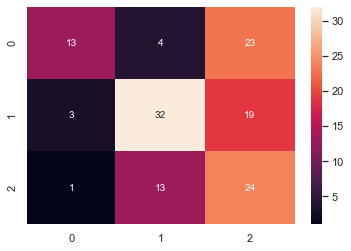

In [114]:
import seaborn as sns

trainX, testX, trainY, testY = train_test_split(x_res, y_res, test_size = 0.2)
  
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

dtree_model = OneVsRestClassifier(DecisionTreeClassifier()).fit(trainX, trainY)

dtree_predictions = dtree_model.predict(testX)
  
# creating a confusion matrix
cm = confusion_matrix(testY, dtree_predictions)

print("-------------------Decision Tree on SMOTE Dataset------------------------------")
print(cm)
print(metrics.classification_report(testY , dtree_predictions ))
sns.heatmap(cm, annot= True)



In [203]:
# Sample output predictions of the Decision Tree Classifier

print("------Predicted and the actual output for Decision Tree Classifier-----")
print(dtree_predictions)
print(testY)
df1 = pd.DataFrame(dtree_predictions, columns = ['Predicted Output'])
df2 = pd.DataFrame(testY, columns = ['Actual Output'])

df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

# append method
result=pd.concat([df1, df2], axis=1)

#print("------Predicted and the actual output for Decision Tree Classifier-----")
result

------Predicted and the actual output for Decision Tree Classifier-----
['H' 'L' 'L' 'L' 'H' 'L' 'L' 'L' 'L' 'H' 'H' 'L' 'H' 'H' 'H' 'H' 'L' 'L'
 'L' 'H' 'L' 'L' 'H' 'A' 'L' 'L' 'L' 'H' 'H' 'L' 'H' 'A' 'A' 'L' 'L' 'H'
 'H' 'A' 'H' 'H' 'H' 'H' 'H' 'L' 'A' 'L' 'H' 'L' 'L' 'L' 'L' 'L' 'L' 'L'
 'L' 'L' 'H' 'H' 'L' 'A' 'A' 'H' 'H' 'A' 'L' 'A' 'L' 'H' 'H' 'L' 'H' 'H'
 'H' 'L' 'L' 'H' 'H' 'L' 'H' 'L' 'H' 'L' 'A' 'H' 'A' 'H' 'L' 'L' 'H' 'L'
 'H' 'L' 'H' 'L' 'L' 'L' 'A' 'L' 'A' 'L' 'H' 'H' 'H' 'A' 'H' 'A' 'L' 'A'
 'L' 'L' 'L' 'H' 'L' 'L' 'L' 'A' 'H' 'L' 'L' 'L' 'L' 'H' 'H' 'L' 'L' 'H'
 'L' 'L' 'H' 'L' 'L' 'L']
['L' 'A' 'L' 'L' 'H' 'L' 'A' 'H' 'A' 'H' 'L' 'A' 'H' 'H' 'L' 'H' 'H' 'L'
 'H' 'H' 'A' 'A' 'L' 'A' 'H' 'H' 'H' 'H' 'H' 'L' 'H' 'A' 'H' 'H' 'A' 'H'
 'H' 'A' 'H' 'H' 'H' 'H' 'H' 'H' 'A' 'L' 'H' 'L' 'H' 'A' 'A' 'A' 'H' 'L'
 'L' 'H' 'H' 'L' 'H' 'A' 'A' 'L' 'H' 'A' 'A' 'A' 'L' 'L' 'H' 'A' 'H' 'H'
 'H' 'A' 'L' 'H' 'H' 'L' 'A' 'A' 'L' 'L' 'A' 'H' 'A' 'H' 'L' 'A' 'A' 'A'
 'A' 'H' 'L' 'A' 'H' 'A' '

,Predicted Output,Actual Output
0,H,L
1,L,A
2,L,L
3,L,L
4,H,H
...,...,...
127,L,L
128,H,H
129,L,H
130,L,H


In [143]:
print("For the Decision Tree classifier : ")
print("The average of the Macro averaged F1 score using the cross validation is:", cross_val_score(dtree_model, x_res, y_res, scoring="f1_macro", cv = 7).mean())
print("The average of the Macro averaged Precision score using the cross validation is:", cross_val_score(dtree_model, x_res, y_res, scoring="precision_macro", cv = 7).mean())
print("The average of the Macro averaged Recall score using the cross validation is:", cross_val_score(dtree_model, x_res, y_res, scoring="recall_macro", cv = 7).mean())
print("The average of the Accuracy using the cross validation is:", cross_val_score(dtree_model, x_res, y_res, scoring="accuracy", cv = 7).mean())


For the Decision Tree classifier : 
The average of the Macro averaged F1 score using the cross validation is: 0.5144991328841474
The average of the Macro averaged Precision score using the cross validation is: 0.563819424269317
The average of the Macro averaged Recall score using the cross validation is: 0.5275537634408602
The average of the Accuracy using the cross validation is: 0.5291313389857623


-------------------Naive Bayes on SMOTE Balanced Dataset------------------------------
0.5
[[17 13 10]
 [14 29 11]
 [ 5 13 20]]
              precision    recall  f1-score   support

           A       0.47      0.42      0.45        40
           H       0.53      0.54      0.53        54
           L       0.49      0.53      0.51        38

    accuracy                           0.50       132
   macro avg       0.50      0.50      0.50       132
weighted avg       0.50      0.50      0.50       132



<AxesSubplot:>

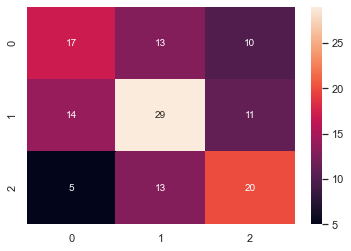

In [115]:
print("-------------------Naive Bayes on SMOTE Balanced Dataset------------------------------")
from sklearn.naive_bayes import GaussianNB

gnb = OneVsRestClassifier(GaussianNB()).fit(trainX, trainY)
gnb_predictions = gnb.predict(testX)
  
# accuracy on X_test
accuracy = gnb.score(testX, testY)
print(accuracy)
  
# creating a confusion matrix
cm = confusion_matrix(testY , gnb_predictions)
print(cm)
print(metrics.classification_report(testY , gnb_predictions ))
sns.heatmap(cm, annot= True)

-----------------ROC/AUC curve for the Naive Bayes Classifier Model-----------------------------


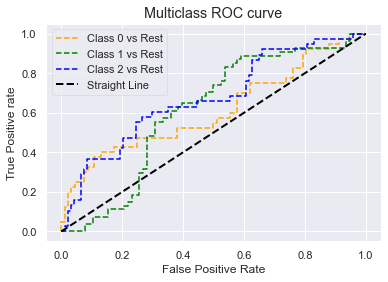

In [181]:
print("-----------------ROC/AUC curve for the Naive Bayes Classifier Model-----------------------------")

from sklearn.metrics import roc_curve

prob=gnb.predict_proba(testX)

fpr={}
tpr={}
thresh={}

fpr[0], tpr[0], thresh[0] = roc_curve( testY , prob[:,0], pos_label='A')
fpr[1], tpr[1], thresh[1] = roc_curve( testY , prob[:,1], pos_label='H')  
fpr[2], tpr[2], thresh[2] = roc_curve( testY , prob[:,2], pos_label='L')


plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=2 ,label='Straight Line' )

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);


In [142]:
print("For the Naive Bayes classifier : ")
print("The average of the Macro averaged F1 score using the cross validation is:", cross_val_score(gnb, x_res, y_res, scoring="f1_macro", cv = 7).mean())
print("The average of the Macro averaged Precision score using the cross validation is:", cross_val_score(gnb, x_res, y_res, scoring="precision_macro", cv = 7).mean())
print("The average of the Macro averaged Recall score using the cross validation is:", cross_val_score(gnb, x_res, y_res, scoring="recall_macro", cv = 7).mean())
print("The average of the Accuracy using the cross validation is:", cross_val_score(gnb, x_res, y_res, scoring="accuracy", cv = 7).mean())


For the Naive Bayes classifier : 
The average of the Macro averaged F1 score using the cross validation is: 0.4005765731906107
The average of the Macro averaged Precision score using the cross validation is: 0.4033713216846847
The average of the Macro averaged Recall score using the cross validation is: 0.4096582181259601
The average of the Accuracy using the cross validation is: 0.40947048472244446


In [205]:
# Sample output predictions of the Naive Bayes Classifier

print("------Predicted and the actual output for Naive Bayes Classifier-----")
print(gnb_predictions)
print(testY)
df1 = pd.DataFrame(gnb_predictions, columns = ['Predicted Output'])
df2 = pd.DataFrame(testY, columns = ['Actual Output'])

df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

# append method
result=pd.concat([df1, df2], axis=1)

#print("------Predicted and the actual output for Naive Bayes Classifier-----")
result

------Predicted and the actual output for Naive Bayes Classifier-----
['H' 'A' 'L' 'A' 'A' 'H' 'A' 'H' 'L' 'H' 'H' 'L' 'H' 'A' 'L' 'H' 'L' 'L'
 'A' 'A' 'H' 'H' 'L' 'A' 'H' 'H' 'L' 'H' 'A' 'H' 'L' 'A' 'H' 'A' 'L' 'H'
 'A' 'A' 'A' 'H' 'L' 'H' 'L' 'A' 'A' 'L' 'L' 'L' 'A' 'H' 'H' 'A' 'H' 'A'
 'L' 'A' 'L' 'L' 'H' 'A' 'A' 'L' 'L' 'A' 'L' 'A' 'L' 'L' 'H' 'H' 'H' 'H'
 'A' 'H' 'L' 'H' 'H' 'L' 'H' 'H' 'L' 'L' 'A' 'H' 'H' 'A' 'L' 'L' 'A' 'L'
 'L' 'L' 'H' 'A' 'H' 'L' 'H' 'H' 'L' 'H' 'H' 'L' 'L' 'H' 'H' 'A' 'H' 'L'
 'H' 'L' 'A' 'H' 'H' 'H' 'A' 'L' 'H' 'H' 'H' 'A' 'A' 'H' 'H' 'A' 'H' 'H'
 'L' 'L' 'H' 'H' 'A' 'H']
['L' 'A' 'L' 'L' 'H' 'L' 'A' 'H' 'A' 'H' 'L' 'A' 'H' 'H' 'L' 'H' 'H' 'L'
 'H' 'H' 'A' 'A' 'L' 'A' 'H' 'H' 'H' 'H' 'H' 'L' 'H' 'A' 'H' 'H' 'A' 'H'
 'H' 'A' 'H' 'H' 'H' 'H' 'H' 'H' 'A' 'L' 'H' 'L' 'H' 'A' 'A' 'A' 'H' 'L'
 'L' 'H' 'H' 'L' 'H' 'A' 'A' 'L' 'H' 'A' 'A' 'A' 'L' 'L' 'H' 'A' 'H' 'H'
 'H' 'A' 'L' 'H' 'H' 'L' 'A' 'A' 'L' 'L' 'A' 'H' 'A' 'H' 'L' 'A' 'A' 'A'
 'A' 'H' 'L' 'A' 'H' 'A' 'H'

,Predicted Output,Actual Output
0,H,L
1,A,A
2,L,L
3,A,L
4,A,H
...,...,...
127,L,L
128,H,H
129,H,H
130,A,H


-------------------SVM on SMOTE Balanced Dataset------------------------------
Test Set Accuracy : 62.121212121212125 %


[[23  2 15]
 [ 4 35 15]
 [ 3 11 24]]
              precision    recall  f1-score   support

           A       0.77      0.57      0.66        40
           H       0.73      0.65      0.69        54
           L       0.44      0.63      0.52        38

    accuracy                           0.62       132
   macro avg       0.65      0.62      0.62       132
weighted avg       0.66      0.62      0.63       132



<AxesSubplot:>

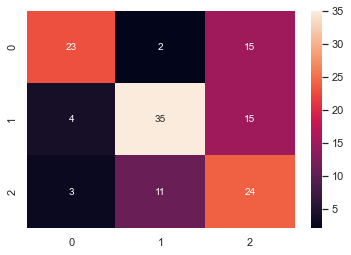

In [178]:
print("-------------------SVM on SMOTE Balanced Dataset------------------------------")
from sklearn.svm import SVC

model = OneVsRestClassifier(SVC(probability=True))
   
# Fitting the model with training data
model.fit(trainX, trainY)
   
# Making a prediction on the test set
prediction = model.predict(testX)
   
# Evaluating the model
print(f"Test Set Accuracy : {accuracy_score(testY, prediction) * 100} %\n\n")

cm = confusion_matrix(testY , prediction)
print(cm)
print(metrics.classification_report(testY , prediction ))
sns.heatmap(cm, annot= True)

In [140]:
print("For the SVM based classifier : ")
print("The average of the Macro averaged F1 score using the cross validation is:", cross_val_score(model, x_res, y_res, scoring="f1_macro", cv = 7).mean())
print("The average of the Macro averaged Precision score using the cross validation is:", cross_val_score(model, x_res, y_res, scoring="precision_macro", cv = 7).mean())
print("The average of the Macro averaged Recall score using the cross validation is:", cross_val_score(model, x_res, y_res, scoring="recall_macro", cv = 7).mean())
print("The average of the Accuracy using the cross validation is:", cross_val_score(model, x_res, y_res, scoring="accuracy", cv = 7).mean())


For the SVM based classifier : 
The average of the Macro averaged F1 score using the cross validation is: 0.5836740468011709
The average of the Macro averaged Precision score using the cross validation is: 0.5897392862236653
The average of the Macro averaged Recall score using the cross validation is: 0.5900537634408601
The average of the Accuracy using the cross validation is: 0.5898736202207647


-----------------ROC/AUC curve for the SVM Classifier Model-----------------------------


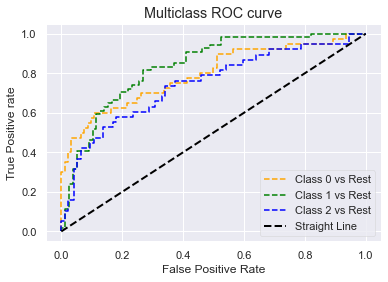

In [180]:
print("-----------------ROC/AUC curve for the SVM Classifier Model-----------------------------")

from sklearn.metrics import roc_curve

prob=model.predict_proba(testX)

fpr={}
tpr={}
thresh={}

fpr[0], tpr[0], thresh[0] = roc_curve( testY , prob[:,0], pos_label='A')
fpr[1], tpr[1], thresh[1] = roc_curve( testY , prob[:,1], pos_label='H')  
fpr[2], tpr[2], thresh[2] = roc_curve( testY , prob[:,2], pos_label='L')



  
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=2 ,label='Straight Line' )

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);


In [206]:
# Sample output predictions of the SVM Classifier-----

print("------Predicted and the actual output for SVM Classifier-----")
print(prediction)
print(testY)
df1 = pd.DataFrame(prediction, columns = ['Predicted Output'])
df2 = pd.DataFrame(testY, columns = ['Actual Output'])

df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

# append method
result=pd.concat([df1, df2], axis=1)

#print("------Predicted and the actual output for SVM Classifier-----")
result

------Predicted and the actual output for SVM Classifier-----
['H' 'L' 'L' 'L' 'H' 'L' 'A' 'H' 'A' 'H' 'H' 'A' 'H' 'A' 'L' 'H' 'L' 'A'
 'H' 'A' 'L' 'A' 'L' 'A' 'H' 'H' 'L' 'H' 'H' 'H' 'L' 'A' 'H' 'H' 'A' 'H'
 'H' 'A' 'H' 'H' 'H' 'H' 'L' 'L' 'A' 'L' 'A' 'L' 'L' 'L' 'A' 'A' 'H' 'H'
 'L' 'L' 'L' 'L' 'H' 'A' 'A' 'L' 'H' 'L' 'L' 'A' 'L' 'L' 'L' 'A' 'H' 'H'
 'A' 'A' 'L' 'H' 'H' 'L' 'L' 'L' 'H' 'L' 'A' 'H' 'L' 'H' 'L' 'L' 'L' 'A'
 'L' 'L' 'H' 'L' 'L' 'A' 'H' 'L' 'L' 'H' 'H' 'A' 'L' 'H' 'H' 'A' 'L' 'A'
 'L' 'L' 'A' 'H' 'L' 'H' 'A' 'L' 'H' 'L' 'H' 'L' 'A' 'H' 'L' 'L' 'H' 'H'
 'L' 'L' 'H' 'L' 'H' 'H']
['L' 'A' 'L' 'L' 'H' 'L' 'A' 'H' 'A' 'H' 'L' 'A' 'H' 'H' 'L' 'H' 'H' 'L'
 'H' 'H' 'A' 'A' 'L' 'A' 'H' 'H' 'H' 'H' 'H' 'L' 'H' 'A' 'H' 'H' 'A' 'H'
 'H' 'A' 'H' 'H' 'H' 'H' 'H' 'H' 'A' 'L' 'H' 'L' 'H' 'A' 'A' 'A' 'H' 'L'
 'L' 'H' 'H' 'L' 'H' 'A' 'A' 'L' 'H' 'A' 'A' 'A' 'L' 'L' 'H' 'A' 'H' 'H'
 'H' 'A' 'L' 'H' 'H' 'L' 'A' 'A' 'L' 'L' 'A' 'H' 'A' 'H' 'L' 'A' 'A' 'A'
 'A' 'H' 'L' 'A' 'H' 'A' 'H' 'H' 'A'

,Predicted Output,Actual Output
0,H,L
1,L,A
2,L,L
3,L,L
4,H,H
...,...,...
127,L,L
128,H,H
129,L,H
130,H,H


-------------------Random Forest Based Ensemble Algorithm on SMOTE Balanced Dataset------------------------------
Test Set Accuracy : 61.36363636363637 %


[[20  3 17]
 [ 2 38 14]
 [ 4 11 23]]
              precision    recall  f1-score   support

           A       0.77      0.50      0.61        40
           H       0.73      0.70      0.72        54
           L       0.43      0.61      0.50        38

    accuracy                           0.61       132
   macro avg       0.64      0.60      0.61       132
weighted avg       0.65      0.61      0.62       132



<AxesSubplot:>

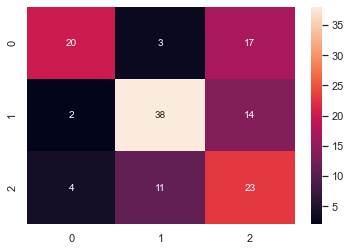

In [217]:
print("-------------------Random Forest Based Ensemble Algorithm on SMOTE Balanced Dataset------------------------------")

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

model = OneVsRestClassifier(RandomForestClassifier())
   
# Fitting the model with training data
model.fit(trainX, trainY)
   
# Making a prediction on the test set
prediction = model.predict(testX)
   
# Evaluating the model
print(f"Test Set Accuracy : {accuracy_score(testY, prediction) * 100} %\n\n")

cm = confusion_matrix(testY , prediction)
print(cm)
print(metrics.classification_report(testY , prediction ))
sns.heatmap(cm, annot= True)

In [218]:
print("For the Random Forest based Ensemble classifier : ")
print("The average of the Macro averaged F1 score using the cross validation is:", cross_val_score(model, x_res, y_res, scoring="f1_macro", cv = 7).mean())
print("The average of the Macro averaged Precision score using the cross validation is:", cross_val_score(model, x_res, y_res, scoring="precision_macro", cv = 7).mean())
print("The average of the Macro averaged Recall score using the cross validation is:", cross_val_score(model, x_res, y_res, scoring="recall_macro", cv = 7).mean())
print("The average of the Accuracy using the cross validation is:", cross_val_score(model, x_res, y_res, scoring="accuracy", cv = 7).mean())

For the Random Forest based Ensemble classifier : 
The average of the Macro averaged F1 score using the cross validation is: 0.6266006042556326
The average of the Macro averaged Precision score using the cross validation is: 0.6478044333386317
The average of the Macro averaged Recall score using the cross validation is: 0.6274001536098311
The average of the Accuracy using the cross validation is: 0.6367941129419293


-----------------ROC/AUC curve for the Random Forest Based Classifier Model-----------------------------


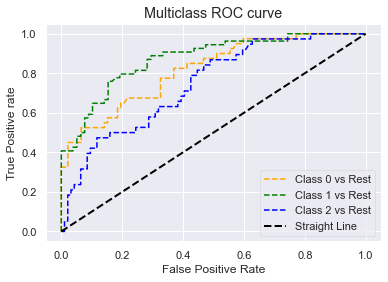

In [220]:
print("-----------------ROC/AUC curve for the Random Forest Based Classifier Model-----------------------------")

from sklearn.metrics import roc_curve

prob=model.predict_proba(testX)

fpr={}
tpr={}
thresh={}

fpr[0], tpr[0], thresh[0] = roc_curve( testY , prob[:,0], pos_label='A')
fpr[1], tpr[1], thresh[1] = roc_curve( testY , prob[:,1], pos_label='H')  
fpr[2], tpr[2], thresh[2] = roc_curve( testY , prob[:,2], pos_label='L')



  
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=2 ,label='Straight Line' )

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

-------------------ZeroR on SMOTE Balanced Dataset------------------------------
[[ 0  0 40]
 [ 0  0 54]
 [ 0  0 38]]
              precision    recall  f1-score   support

           A       0.00      0.00      0.00        40
           H       0.00      0.00      0.00        54
           L       0.29      1.00      0.45        38

    accuracy                           0.29       132
   macro avg       0.10      0.33      0.15       132
weighted avg       0.08      0.29      0.13       132



<AxesSubplot:>

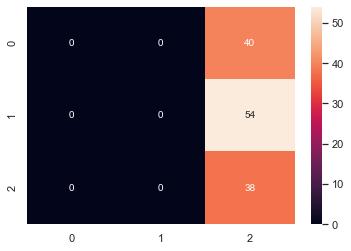

In [123]:
from random import seed
from random import randrange
 
# zero rule algorithm for classification
def zero_rule(train, test):
    output_class = [row[-1] for row in train]
    #print(output_class)
    prediction = max(set(output_class), key=output_class.count)
    #print(prediction)
    predicted = [prediction for i in range(len(test))]
    return predicted


predictions = zero_rule(trainY, testX)
cm = confusion_matrix(testY, predictions)

print("-------------------ZeroR on SMOTE Balanced Dataset------------------------------")
print(cm)
print(metrics.classification_report(testY , predictions ))
sns.heatmap(cm, annot= True)

### Hence it can be seen that the model is performing better than the Baseline Zero R algorithm

-------------------Logistic Regression on SMOTE Balanced Dataset------------------------------
Test Set Accuracy : 52.27272727272727 %


[[21 15  6]
 [ 8 17  9]
 [17  8 31]]
              precision    recall  f1-score   support

           A       0.46      0.50      0.48        42
           H       0.42      0.50      0.46        34
           L       0.67      0.55      0.61        56

    accuracy                           0.52       132
   macro avg       0.52      0.52      0.51       132
weighted avg       0.54      0.52      0.53       132



<AxesSubplot:>

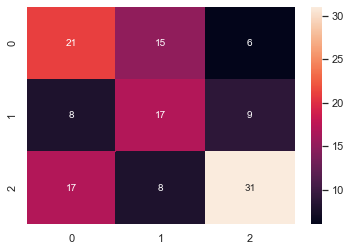

In [131]:
#Scaling the Data for Logistic Regression
from sklearn.preprocessing import StandardScaler

x = merged_df.drop(['Elevel'], axis=1)
y = merged_df['Elevel']

ss=StandardScaler()

merged_df[['Groundcapacity']] = ss.fit_transform(merged_df[['Groundcapacity']])
merged_df[['CRating']] = ss.fit_transform(merged_df[['CRating']])

sm = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=100)

x_res, y_res = sm.fit_resample(x.to_numpy(), y.to_numpy())

X_train, X_test, Y_train , Y_test = train_test_split(x_res, y_res, test_size = 0.2)

log_reg = OneVsRestClassifier(LogisticRegression())

log_reg.fit(X_train , Y_train)
y_pred = log_reg.predict(X_test)

print("-------------------Logistic Regression on SMOTE Balanced Dataset------------------------------")

# Evaluating the model
print(f"Test Set Accuracy : {accuracy_score(Y_test, y_pred) * 100} %\n\n")

cm = confusion_matrix(Y_test , y_pred)
print(cm)
print(metrics.classification_report(Y_test , y_pred))
sns.heatmap(cm, annot= True)

-----------------ROC/AUC curve for the Logistic Regression Classifier Model-----------------------------


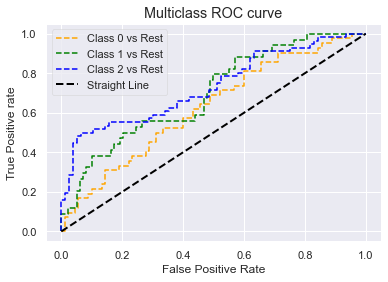

In [176]:
print("-----------------ROC/AUC curve for the Logistic Regression Classifier Model-----------------------------")

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

prob = log_reg.predict_proba(X_test)

noc = 3

fpr = {}
tpr = {}
thresh ={}


fpr[0], tpr[0], thresh[0] = roc_curve( Y_test , prob[:,0], pos_label='A')
fpr[1], tpr[1], thresh[1] = roc_curve( Y_test , prob[:,1], pos_label='H')  
fpr[2], tpr[2], thresh[2] = roc_curve( Y_test , prob[:,2], pos_label='L')
  
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=2 ,label='Straight Line' )

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);


In [141]:
print("For the Logistic Rgeression based classifier : ")
print("The average of the Macro averaged F1 score using the cross validation is:", cross_val_score(log_reg, x_res, y_res, scoring="f1_macro", cv = 7).mean())
print("The average of the Macro averaged Precision score using the cross validation is:", cross_val_score(log_reg, x_res, y_res, scoring="precision_macro", cv = 7).mean())
print("The average of the Macro averaged Recall score using the cross validation is:", cross_val_score(log_reg, x_res, y_res, scoring="recall_macro", cv = 7).mean())
print("The average of the Accuracy using the cross validation is:", cross_val_score(log_reg, x_res, y_res, scoring="accuracy", cv = 7).mean())


For the Logistic Rgeression based classifier : 
The average of the Macro averaged F1 score using the cross validation is: 0.47100740691750004
The average of the Macro averaged Precision score using the cross validation is: 0.48078801883530253
The average of the Macro averaged Recall score using the cross validation is: 0.4780145929339477
The average of the Accuracy using the cross validation is: 0.47774756039033756


In [207]:
# Sample output predictions of the Logistic Regression Classifier-----

print("------Predicted and the actual output for Logistic Regression Classifier-----")
print(y_pred)
print(Y_test)
df1 = pd.DataFrame(prediction, columns = ['Predicted Output'])
df2 = pd.DataFrame(Y_test, columns = ['Actual Output'])

df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

# append method
result=pd.concat([df1, df2], axis=1)

#print("------Predicted and the actual output for Logistic Regression Classifier-----")
result

------Predicted and the actual output for Logistic Regression Classifier-----
['H' 'A' 'H' 'H' 'A' 'L' 'H' 'A' 'L' 'H' 'A' 'L' 'L' 'A' 'A' 'H' 'A' 'A'
 'L' 'L' 'H' 'A' 'H' 'L' 'L' 'A' 'L' 'L' 'L' 'L' 'A' 'H' 'A' 'H' 'H' 'A'
 'L' 'A' 'A' 'A' 'L' 'L' 'A' 'L' 'A' 'H' 'L' 'L' 'L' 'H' 'A' 'A' 'L' 'H'
 'L' 'A' 'L' 'A' 'H' 'L' 'A' 'A' 'L' 'H' 'L' 'L' 'A' 'H' 'L' 'L' 'A' 'H'
 'A' 'H' 'A' 'A' 'H' 'H' 'L' 'L' 'L' 'H' 'A' 'H' 'L' 'H' 'L' 'A' 'H' 'H'
 'H' 'H' 'L' 'A' 'L' 'H' 'A' 'A' 'L' 'A' 'H' 'A' 'L' 'H' 'A' 'H' 'A' 'L'
 'A' 'L' 'H' 'H' 'L' 'A' 'A' 'A' 'H' 'L' 'A' 'A' 'H' 'L' 'L' 'A' 'H' 'L'
 'H' 'A' 'H' 'L' 'H' 'L']
['A' 'L' 'A' 'H' 'L' 'L' 'A' 'A' 'L' 'A' 'H' 'A' 'L' 'H' 'L' 'H' 'L' 'A'
 'H' 'A' 'H' 'A' 'A' 'L' 'H' 'H' 'L' 'L' 'L' 'L' 'L' 'H' 'A' 'A' 'L' 'H'
 'L' 'A' 'H' 'A' 'H' 'L' 'L' 'A' 'A' 'A' 'H' 'L' 'A' 'H' 'A' 'L' 'L' 'A'
 'L' 'A' 'L' 'A' 'A' 'H' 'A' 'A' 'L' 'A' 'L' 'L' 'A' 'L' 'A' 'L' 'L' 'H'
 'L' 'L' 'A' 'L' 'A' 'H' 'L' 'L' 'L' 'H' 'L' 'L' 'H' 'H' 'A' 'L' 'A' 'L'
 'H' 'A' 'L' 'L' 'H'

,Predicted Output,Actual Output
0,H,A
1,L,L
2,L,A
3,L,H
4,H,L
...,...,...
127,L,A
128,H,L
129,L,L
130,H,H


In [ ]:
###-------------------------------Suggestions by the Professor-----------------------------------------------

###try (automatic) attribute subset selection, as well as different supervised ML algorithms. 


In [4]:
!pip install autoviml

  Using cached autoviml-0.1.681-py3-none-any.whl (125 kB)
  Using cached xgboost-1.4.1-py3-none-win_amd64.whl (97.8 MB)
  Using cached emoji-1.2.0-py3-none-any.whl (131 kB)
  Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl (125 kB)
  Using cached catboost-0.25.1-cp38-none-win_amd64.whl (66.9 MB)
  Using cached shap-0.39.0-cp38-cp38-win_amd64.whl (414 kB)
  Using cached plotly-4.14.3-py2.py3-none-any.whl (13.2 MB)
  Using cached graphviz-0.16-py2.py3-none-any.whl (19 kB)
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
Processing c:\users\vikhyat\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56\retrying-1.3.3-py3-none-any.whl


In [5]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.681. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.0.45.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


'model, features, trainm, testm = \nAuto_ViML(train = df_,\ntarget = "Elevel",\ntest = "",\nsample_submission = "",\n#We set the hyperparameter search to RS (Randomized Search) for faster model creation. We set the scoring foxus to RMSE as this is regression case and boosting flag as False to using the Random Forest or True to use XGBoost Tree. We also use the feature reduction as True. \nhyper_param="RS",\nfeature_reduction=True,\nscoring_parameter="RMSE",\nBoosting_Flag=True,\nverbose = 2)'

In [37]:
#Dataset was read in order to again do the automatic model creation

df1 = pd.read_csv('final.csv')

df1.columns

Index(['Unnamed: 0', 'daynight', 'night', 'Australia', 'Bangladesh', 'England',
       'India', 'New Zealand', 'Pakistan', 'South Africa', 'Sri Lanka',
       'West Indies', 'Australia_', 'Bangladesh_', 'England_', 'India_',
       'New Zealand_', 'Pakistan_', 'South Africa_', 'Sri Lanka_',
       'West Indies_', 'Ha1', 'Ha2', 'T1w', 'T2w', 'T1b', 'Groundcapacity',
       'AvgSR', 'CRating', 'Elevel'],
      dtype='object')

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (486, 30)
    Training Set Memory Usage = 0.11 MB
Single_Label Target: ['Elevel']
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
ALERT! Setting Imbalanced_Flag to True in Auto_ViML for Multi_Classification problems improves results!
       Class  -> Counts -> Percent
           A:     116  ->   23.9%
           H:     150  ->   30.9%
           L:     220  ->   45.3%
CAUTION: In Multi-Class Boosting (2+ classes), TRAINING WILL TAKE A LOT OF TIME!
String or Multi Class target: Elevel transformed as follows: {'L': 0, 'H': 1, 'A': 2}
Alert! Rare Class is not 1 but 2 in this data set
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    29 Predictors classified...
        This does not include the Target column(s)
    1 variables removed s

[01:29:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:29:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:29:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:29:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

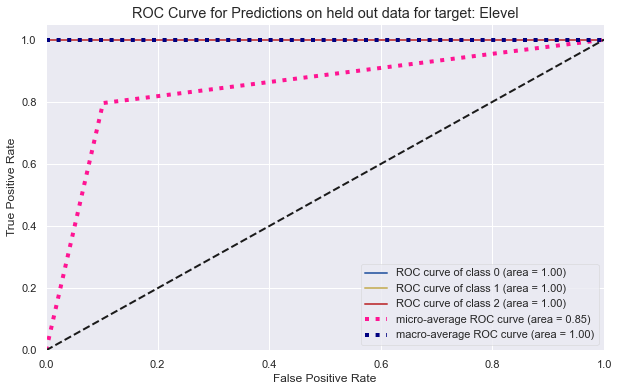

Average precision score, micro-averaged over all classes: 0.94
Macro F1 score, averaged over all classes: 0.70


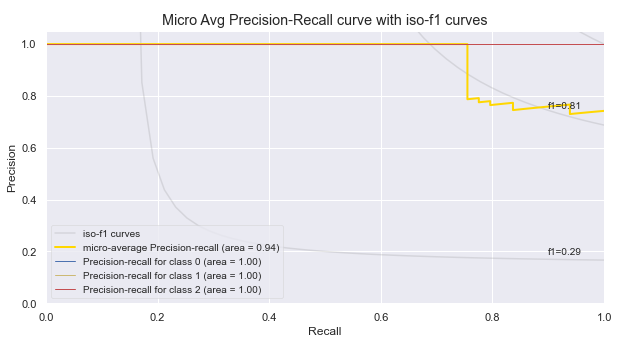

Could not plot Model Evaluation Results Metrics
    Time taken for this Target (in seconds) = 5
    Binning_Flag set to False or there are no float vars in data set to be binned
CAUTION: Stacking can produce Highly Overfit models on Training Data...
    Adding 2 Stacking feature(s) to training data
Performing MinMax scaling of train and test data...
#####   T R A I N I N G   M O D E L   O N    F U L L   T R A I N  D A T A  #############
##################  Imbalanced Model Training  ############################
Imbalanced Training using SMOTE Rare Class Oversampling method...
Using SMOTE's over-sampling techniques to make the 3 classes balanced...
    This is not an Imbalanced data set. No need to use SMOTE but continuing...
    class_weights = [0.73636364 1.08       1.39655172]
    class_weighted_rows = {0: 220, 1: 162, 2: 162}
Training model now on resampled train data: (544, 22). This will take time...
[01:29:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/

[01:29:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:29:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:29:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:29:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Could not plot SHAP values since SHAP is not installed or could not import SHAP in this machine
############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 15
Writing Output files to disk...
    Saving predictions to .\Elevel\Elevel_Multi_Classification_test_modified.csv
    Saving predictions to .\Elevel\Elevel_Multi_Classification_submission.csv
    Saving predictions to .\Elevel\Elevel_Multi_Classification_train_modified.csv
###############  C O M P L E T E D  ################
Time Taken in mins = 0.2 for the Entire Process


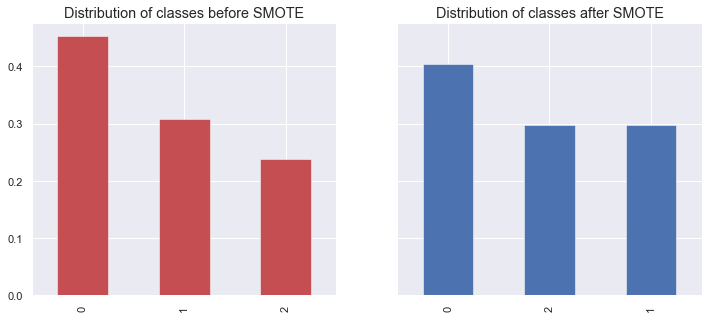

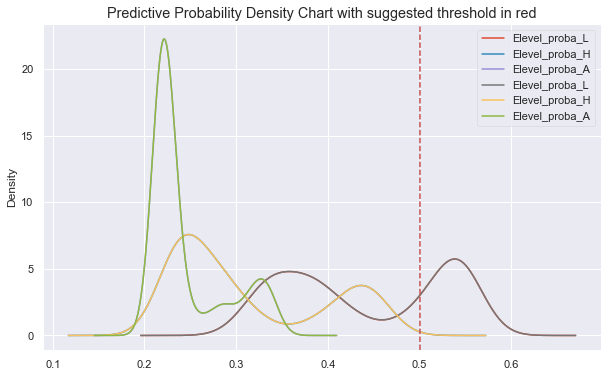

In [38]:
#Basic Example with all parameters
model, features, trainm, testm = Auto_ViML(
    train = df1,
    target = "Elevel",
    test= "",
    sample_submission= "",
    hyper_param="RS",
    feature_reduction=True,
    scoring_parameter="weighted-f1",
    KMeans_Featurizer=False,
    Boosting_Flag=True,
    Binning_Flag=False,
    Add_Poly=False,
    Stacking_Flag=True,
    Imbalanced_Flag=True,
    verbose=3)


In [40]:
model

CalibratedClassifierCV(base_estimator=OneVsRestClassifier(estimator=XGBClassifier(base_score=None,
                                                                                  booster='gbtree',
                                                                                  colsample_bylevel=None,
                                                                                  colsample_bynode=None,
                                                                                  colsample_bytree=None,
                                                                                  gamma=None,
                                                                                  gpu_id=None,
                                                                                  importance_type='gain',
                                                                                  interaction_constraints=None,
                                                                              

In [58]:
#Used the model which was automatically generated in order to evaluate its performance
y=trainm["Elevel"]
x=trainm.drop(['Elevel'], axis=1)

trainX, testX, trainY, testY = train_test_split(x, y , test_size = 0.1)


predictions = model.predict(testX)
  
# accuracy on X_test
accuracy = model.score(testX, testY)
print(accuracy)
  
# creating a confusion matrix
cm = confusion_matrix(testY , predictions)
print(cm)
print(metrics.classification_report(testY , predictions ))

#scores=cross_validate(model, trainX, trainY, scoring =scoring , cv=5)
#scores

0.5102040816326531
[[16  1  0]
 [ 8  9  0]
 [10  5  0]]
              precision    recall  f1-score   support

           0       0.47      0.94      0.63        17
           1       0.60      0.53      0.56        17
           2       0.00      0.00      0.00        15

    accuracy                           0.51        49
   macro avg       0.36      0.49      0.40        49
weighted avg       0.37      0.51      0.41        49



In [ ]:
#Refrences :  medium.com, geeksforgeeks.com, machinelearningmastery.com, analyticsvidhya.com , stackoverflow.com etc.
#they were used with thorough understanding 